# Spectrogram Benchmark
This notebook is used for testing and benchmarking performance of a single spectrogram.

In [17]:
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys

import mock_payload_generator as payload_generator
import utils
from producer import Producer

In [18]:
producer = Producer()


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe619569430>


Task was destroyed but it is pending!
task: <Task pending name='Task-24' coro=<Sender._sender_routine() running at /home/saiful/code/streaming-vis-perf/producer/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe61a2a4d00>()]> cb=[Sender._fail_all()]>


### Plot Payload Size Statistics

In [4]:
# generate payload size data for the benchmark

data = []
unit = "KB"
num_spectrograms = 1

for num_channels in range(25000, 610000, 25000):
    _, size = payload_generator.spectrogram_protobus(num_spectrograms, num_channels)
    a = {
        "Size" : utils.convert_bytes(size, unit),
        "Channels": num_channels,
        "Encoding": "ProtoBuf",
    }
    data.append(a)
    
    _, size = payload_generator.spectrogram_json(num_spectrograms, num_channels)
    b = {
        "Size" : utils.convert_bytes(size, unit),
        "Channels": num_channels,
        "Encoding": "JSON (UTF-8)",
    }
    data.append(b)


df = pd.DataFrame(data)

In [5]:
df.head

<bound method NDFrame.head of       Size  Channels      Encoding
0     40.0     25000      ProtoBuf
1    115.0     25000  JSON (UTF-8)
2     80.0     50000      ProtoBuf
3    229.0     50000  JSON (UTF-8)
4    120.0     75000      ProtoBuf
5    344.0     75000  JSON (UTF-8)
6    161.0    100000      ProtoBuf
7    459.0    100000  JSON (UTF-8)
8    201.0    125000      ProtoBuf
9    573.0    125000  JSON (UTF-8)
10   241.0    150000      ProtoBuf
11   688.0    150000  JSON (UTF-8)
12   281.0    175000      ProtoBuf
13   802.0    175000  JSON (UTF-8)
14   321.0    200000      ProtoBuf
15   917.0    200000  JSON (UTF-8)
16   362.0    225000      ProtoBuf
17  1031.0    225000  JSON (UTF-8)
18   402.0    250000      ProtoBuf
19  1146.0    250000  JSON (UTF-8)
20   442.0    275000      ProtoBuf
21  1261.0    275000  JSON (UTF-8)
22   482.0    300000      ProtoBuf
23  1375.0    300000  JSON (UTF-8)
24   522.0    325000      ProtoBuf
25  1490.0    325000  JSON (UTF-8)
26   562.0    350000     

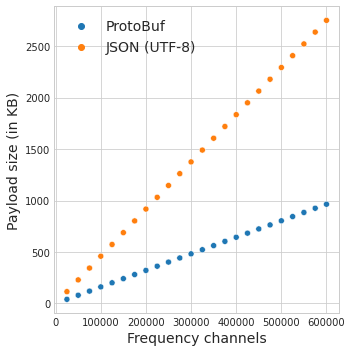

In [6]:
# plot
plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(5, 5), tight_layout=True)

p = sns.scatterplot(data=df, x="Channels", y="Size", hue="Encoding")

p.set_xlabel("Frequency channels", fontsize=14)
p.set_ylabel(f"Payload size (in {unit})", fontsize=14)
plt.legend(fontsize=14)

### Plot Payload Decoding Time

In [16]:
# generate payload and send to producer of broker

protocol = "spectrogram-protobuf"

for num_channels in range(10000, 80000, 10000):
    for itr in range(5):
        sleep(1)
        payload, _ = payload_generator.spectrogram_protobus(num_spectrograms, num_channels)
        await producer.produce(payload, protocol)


Topic spectrogram-protobuf is not available during auto-create initialization


In [8]:
protocol = "spectrogram-json"

for num_channels in range(10000, 80000, 10000):
    for itr in range(5):
        sleep(1)
        payload, _ = gp.spectrogram_json(num_spectrograms, num_channels)
        await produce(payload, protocol)


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f243e556f40>
Task was destroyed but it is pending!
task: <Task pending name='Task-3614' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f243ea26b50>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f243ea26730>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f243d796be0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3634' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f244064ea90>()]> cb=[Sender._fail_all

In [32]:
protobuf_decoding_time = [
    14.300000004470348,
    7.299999997019768,
    6.399999998509884,
    2.2000000029802322,
    2.6999999955296516,
    3.399999998509884,
    5.100000001490116,
    2.9000000059604645,
    2.600000001490116,
    3.2999999970197678,
    3.899999998509884,
    4.4000000059604645,
    4.399999998509884,
    4.299999997019768,
    3.8000000044703484,
    5.700000002980232,
    8.700000002980232,
    5.5,
    7,
    5,
    6.0999999940395355,
    7.300000004470348,
    6.200000002980232,
    7.399999998509884,
    6.5,
    10,
    9.599999994039536,
    7.800000004470348,
    8.899999998509884,
    9,
    9.399999998509884,
    8.899999998509884,
    9.5,
    11.200000002980232,
    9.200000002980232,
    2.399999998509884,
    3.2000000029802322,
    3.2999999970197678,
    2.5,
    3.2999999970197678,
    5.600000001490116,
    5.5999999940395355,
    13.800000004470348,
    15.5,
    6.100000001490116,
    7.5,
    7.9000000059604645,
    7.899999998509884,
    8.100000001490116,
    8.799999997019768,
    9.600000001490116,
    11.300000004470348,
    11,
    10.799999997019768,
    9.800000004470348,
    13,
    12.100000001490116,
    11.5,
    11.700000002980232,
    12,
    15.399999998509884,
    16.200000002980232,
    17.599999994039536,
    16.399999998509884,
    15.599999994039536,
    17.5,
    16.80000000447035,
    18.69999999552965,
    16.900000005960464,
    17.69999999552965,
    3.899999998509884,
    3.600000001490116,
    3.4000000059604645,
    3.100000001490116,
    4.399999998509884,
    6.700000002980232,
    7.300000004470348,
    7.699999995529652,
    6.9000000059604645,
    7.200000002980232,
    10.299999997019768,
    11.600000001490116,
    12.100000001490116,
    10.399999998509884,
    10.5,
    15.899999998509884,
    15.600000001490116,
    15.399999998509884,
    15.100000001490116,
    14.899999998509884,
    18.200000002980232,
    17.299999997019768,
    17.899999998509884,
    17.69999999552965,
    18.599999994039536,
    23.799999997019768,
    23.100000001490116,
    23.100000001490116,
    22.900000005960464,
    23.399999998509884,
    25.200000002980232,
    25.30000000447035,
    25.399999998509884,
    25.600000001490116,
    26.5,
    4.299999997019768,
    4.799999997019768,
    4.299999997019768,
    4.5,
    4.600000001490116,
    10.399999998509884,
    9.600000001490116,
    9.100000001490116,
    9.899999998509884,
    9.899999998509884,
    14.100000001490116,
    14.200000002980232,
    14.5,
    13.600000001490116,
    14.100000001490116,
    23.399999998509884,
    20,
    37.899999998509884,
    19.399999998509884,
    24.899999998509884,
    24,
    29.599999994039536,
    22.69999999552965,
    29.100000001490116,
    23.200000002980232,
    42.5,
    32,
    32.100000001490116,
    30.600000001490116,
    30.700000002980232,
    37.900000005960464,
    40,
    33.600000001490116,
    38.099999994039536,
    38.5,
    5.899999998509884,
    5.899999998509884,
    6.5,
    5.600000001490116,
    5.899999998509884,
    12.600000001490116,
    15.200000002980232,
    13.699999995529652,
    12.399999998509884,
    14.800000004470348,
    17.5,
    16.700000002980232,
    16.80000000447035,
    16.69999999552965,
    17.299999997019768,
    32,
    25.100000001490116,
    25.100000001490116,
    24.80000000447035,
    25.80000000447035,
    33.69999999552965,
    28.299999997019768,
    28.600000001490116,
    28.899999998509884,
    35.399999998509884,
    45.600000001490116,
    47,
    51.5,
    37.80000000447035,
    38.30000000447035,
    46.400000005960464,
    50.30000000447035,
    43.20000000298023,
    41.30000000447035,
    60,
    6.399999998509884,
    7.700000002980232,
    8.199999995529652,
    6.199999995529652,
    6.100000001490116,
    14.699999995529652,
    15.799999997019768,
    15.299999997019768,
    15.799999997019768,
    14.600000001490116,
    27.700000002980232,
    21.69999999552965,
    20.400000005960464,
    20.5,
    28.600000001490116,
    34.30000000447035,
    32.399999998509884,
    29.5,
    30.100000001490116,
    29,
    36.600000001490116,
    35.099999994039536,
    36,
    35,
    34.79999999701977,
    54.70000000298023,
    57.5,
    52.29999999701977,
    52.5,
    46.20000000298023,
    59.100000001490116,
    61.20000000298023,
    58.29999999701977,
    58.5,
    56.399999998509884,
    10,
    8.800000004470348,
    7.5,
    8,
    7.800000004470348,
    17.899999998509884,
    21.80000000447035,
    18.69999999552965,
    22.399999998509884,
    17.69999999552965,
    32.69999999552965,
    23.899999998509884,
    29.200000002980232,
    23.5,
    25.299999997019768,
    33.80000000447035,
    35.600000001490116,
    34.600000001490116,
    35.69999999552965,
    33.900000005960464,
    46.79999999701977,
    46.80000000447035,
    40,
    40.099999994039536,
    41.29999999701977,
    63.70000000298023,
    68.30000000447035,
    61.70000000298023,
    60.100000001490116,
    59.399999998509884,
    67.20000000298023,
    67.29999999701977,
    67.09999999403954,
    68.40000000596046,
    67.89999999850988,
    9.399999998509884,
    9,
    9.799999997019768,
    9.199999995529652,
    9.200000002980232,
    20.700000002980232,
    19.5,
    19.399999998509884,
    19.899999998509884,
    20.600000001490116,
    27,
    27.5,
    26.899999998509884,
    26.600000001490116,
    26.80000000447035,
    47.099999994039536,
    48.399999998509884,
    44.900000005960464,
    39.29999999701977,
    45.600000001490116,
    53.69999999552965,
    52.30000000447035,
    50.29999999701977,
    52.899999998509884,
    51.79999999701977,
    72.89999999850988,
    73.69999999552965,
    69.20000000298023,
    70.90000000596046,
    71.10000000149012,
    79.20000000298023,
    78.19999999552965,
    73.80000000447035,
    78.29999999701977,
    76.5,
    11.899999998509884,
    11.199999995529652,
    12,
    10.200000002980232,
    10.800000004470348,
    41.100000001490116,
    22.900000005960464,
    27.399999998509884,
    26.200000002980232,
    27.19999999552965,
    35.79999999701977,
    45.20000000298023,
    30.399999998509884,
    30.5,
    31.399999998509884,
    53.79999999701977,
    57.5,
    45.20000000298023,
    43.899999998509884,
    51,
    62.19999999552965,
    55.899999998509884,
    51.899999998509884,
    56.79999999701977,
    61.899999998509884,
    82.39999999850988,
    83.40000000596046,
    80,
    89.5,
    97.89999999850988,
    100.5,
    98.60000000149012,
    97.5,
    95.5,
    100.29999999701977,
    13.799999997019768,
    13.399999998509884,
    12.5,
    11.399999998509884,
    11.100000001490116,
    32.399999998509884,
    26.900000005960464,
    27.099999994039536,
    26,
    26.80000000447035,
    38.399999998509884,
    44.899999998509884,
    34.100000001490116,
    33.29999999701977,
    33,
    65.69999999552965,
    62.70000000298023,
    58.5,
    57,
    57.5,
    68.60000000149012,
    67.39999999850988,
    78.20000000298023,
    65.10000000149012,
    69.79999999701977,
    88,
    90,
    94.70000000298023,
    100.20000000298023,
    100.60000000149012,
    106.39999999850988,
    107.29999999701977,
    107.79999999701977,
    100.39999999850988,
    103.5
]

In [33]:
json_decoding_time = [
    1.3999999985098839,
    1.6000000014901161,
    1.3000000044703484,
    1.5,
    1.3000000044703484,
    2.8000000044703484,
    2.5,
    2.5,
    2.600000001490116,
    3.0999999940395355,
    5.399999998509884,
    7.199999995529652,
    4.5999999940395355,
    4.5,
    6.100000001490116,
    5.899999998509884,
    6.399999998509884,
    5.899999998509884,
    6.299999997019768,
    6,
    9.300000004470348,
    7.100000001490116,
    9.400000005960464,
    8,
    11.699999995529652,
    8.799999997019768,
    13,
    9.799999997019768,
    12.300000004470348,
    8.799999997019768,
    13,
    10.5,
    10,
    13.799999997019768,
    10.600000001490116,
    2.5,
    2.600000001490116,
    3.100000001490116,
    2.5,
    6.100000001490116,
    7.100000001490116,
    6.399999998509884,
    6.5,
    5.600000001490116,
    4.800000004470348,
    8.899999998509884,
    7.100000001490116,
    8,
    9.600000001490116,
    13.699999995529652,
    11.300000004470348,
    11.600000001490116,
    16.100000001490116,
    13.899999998509884,
    14.799999997019768,
    18.600000001490116,
    17.399999998509884,
    17.399999998509884,
    18.299999997019768,
    17.599999994039536,
    20.69999999552965,
    20.900000005960464,
    20.899999998509884,
    18.700000002980232,
    19,
    24.700000002980232,
    22.5,
    22.700000002980232,
    24.5,
    22,
    3.7000000029802322,
    4.299999997019768,
    4,
    10,
    4.799999997019768,
    9.799999997019768,
    7.399999998509884,
    8.600000001490116,
    7.199999995529652,
    10.899999998509884,
    12.799999997019768,
    10.800000004470348,
    10.700000002980232,
    10.899999998509884,
    11.399999998509884,
    15.400000005960464,
    22.200000002980232,
    19.69999999552965,
    19.100000001490116,
    18.600000001490116,
    25.400000005960464,
    23.599999994039536,
    23.899999998509884,
    22.5,
    23.600000001490116,
    29.400000005960464,
    27.299999997019768,
    28.600000001490116,
    27.5,
    29.799999997019768,
    37.69999999552965,
    35.5,
    32.899999998509884,
    33.399999998509884,
    33.600000001490116,
    5.100000001490116,
    5.4000000059604645,
    11,
    4.899999998509884,
    5.5999999940395355,
    9.699999995529652,
    15.799999997019768,
    11.600000001490116,
    9.699999995529652,
    13.5,
    14.600000001490116,
    15.399999998509884,
    14.299999997019768,
    14.100000001490116,
    15,
    20.5,
    28.399999998509884,
    27.799999997019768,
    27.5,
    25.899999998509884,
    32.69999999552965,
    30.80000000447035,
    31.5,
    31.700000002980232,
    30.799999997019768,
    49.399999998509884,
    37.899999998509884,
    50.79999999701977,
    51.100000001490116,
    38.899999998509884,
    42.69999999552965,
    42,
    41.20000000298023,
    44.600000001490116,
    56.899999998509884,
    6.199999995529652,
    7.5999999940395355,
    5.800000004470348,
    6.600000001490116,
    6.100000001490116,
    12.700000002980232,
    20.19999999552965,
    16.700000002980232,
    12.199999995529652,
    11.800000004470348,
    18.799999997019768,
    18.399999998509884,
    18.100000001490116,
    17.700000002980232,
    17.5,
    32.79999999701977,
    34.599999994039536,
    31.899999998509884,
    29.799999997019768,
    32.70000000298023,
    38.399999998509884,
    39.5,
    42.100000001490116,
    58.599999994039536,
    38.30000000447035,
    46,
    47.29999999701977,
    51.19999999552965,
    46.5,
    44,
    55.5,
    56.600000001490116,
    59.19999999552965,
    57.70000000298023,
    58.5,
    7.399999998509884,
    8.699999995529652,
    7.600000001490116,
    8,
    7,
    22.599999994039536,
    22.69999999552965,
    15.200000002980232,
    14.200000002980232,
    14.100000001490116,
    33,
    27.299999997019768,
    29.200000002980232,
    27,
    25.100000001490116,
    39.79999999701977,
    37.399999998509884,
    38.20000000298023,
    38.899999998509884,
    35.600000001490116,
    45,
    47.20000000298023,
    47.899999998509884,
    46.19999999552965,
    47.30000000447035,
    57.20000000298023,
    54.100000001490116,
    57,
    57,
    56.79999999701977,
    64.80000000447035,
    64.10000000149012,
    63.69999999552965,
    69.89999999850988,
    64.5,
    9.600000001490116,
    14.799999997019768,
    8.200000002980232,
    14.799999997019768,
    8.300000004470348,
    23.69999999552965,
    17.69999999552965,
    21.799999997019768,
    16.599999994039536,
    17.600000001490116,
    37.70000000298023,
    37.30000000447035,
    42.19999999552965,
    34.600000001490116,
    47.30000000447035,
    42.099999994039536,
    41.899999998509884,
    44.100000001490116,
    44.100000001490116,
    41.600000001490116,
    55,
    57.29999999701977,
    55.29999999701977,
    55.899999998509884,
    53.29999999701977,
    62.100000001490116,
    64.19999999552965,
    65.29999999701977,
    62.899999998509884,
    66.69999999552965,
    75.29999999701977,
    84.5,
    87.60000000149012,
    98.60000000149012,
    85.90000000596046,
    10.100000001490116,
    9.899999998509884,
    14.399999998509884,
    12,
    9.299999997019768,
    19.600000001490116,
    20,
    19.400000005960464,
    19,
    19,
    41.20000000298023,
    41.80000000447035,
    38,
    38.600000001490116,
    41.100000001490116,
    49.600000001490116,
    50.600000001490116,
    50.29999999701977,
    61.399999998509884,
    50.79999999701977,
    65.5,
    59.600000001490116,
    63.29999999701977,
    58.20000000298023,
    63.5,
    73.70000000298023,
    84.70000000298023,
    78.60000000149012,
    80.30000000447035,
    69.29999999701977,
    79.5,
    80.29999999701977,
    81.79999999701977,
    80.60000000149012,
    78.79999999701977,
    11.100000001490116,
    11.200000002980232,
    10.600000001490116,
    11.399999998509884,
    11.299999997019768,
    26.69999999552965,
    27.399999998509884,
    28.5,
    34.29999999701977,
    25.600000001490116,
    46.099999994039536,
    44.5,
    41.899999998509884,
    43,
    54.100000001490116,
    57.5,
    55.399999998509884,
    53.79999999701977,
    68.10000000149012,
    55.100000001490116,
    69.39999999850988,
    77.5,
    77.39999999850988,
    75.39999999850988,
    76.89999999850988,
    98.5,
    88.60000000149012,
    85.79999999701977,
    87.20000000298023,
    98.59999999403954,
    101.40000000596046,
    128.20000000298023,
    104.69999999552965,
    104.29999999701977,
    105.39999999850988,
    12.5,
    15.5,
    11.699999995529652,
    12.600000001490116,
    15.5,
    38.19999999552965,
    38.30000000447035,
    40.100000001490116,
    36.400000005960464,
    37,
    57.599999994039536,
    49.899999998509884,
    47.100000001490116,
    48.5,
    56.899999998509884,
    66.60000000149012,
    60.29999999701977,
    63.5,
    60.399999998509884,
    63.5,
    86,
    73,
    74.09999999403954,
    70,
    73.70000000298023,
    82.89999999850988,
    83,
    97.5,
    87.39999999850988,
    87.10000000149012,
    113.30000000447035,
    109.40000000596046,
    110.29999999701977,
    112.5,
    98.70000000298023
]

In [34]:
idx = 0
_df = []

for num_channels in range(10000, 80000, 10000):
    for itr in range(5):
        if len(protobuf_decoding_time) > 0:
            d1 = {
                "Spectrograms": num_spectrograms,
                "Channels": num_channels,
                "Itr": itr,
                "Time": protobuf_decoding_time[idx],
                "Encoding": "ProtoBuf",
            }
            _df.append(d1)

        if len(json_decoding_time) > 0:
            d2 = {
                "Spectrograms": num_spectrograms,
                "Channels": num_channels,
                "Itr": itr,
                "Time": json_decoding_time[idx],
                "Encoding": "JSON (UTF-8)",
            }
            _df.append(d2)

        idx += 1

df = pd.DataFrame(_df)

In [32]:
df

,Spectrograms,Channels,Itr,Time,Encoding
0,10,10000,0,14.3,ProtoBuf
1,10,10000,0,1.4,JSON (UTF-8)
2,10,10000,1,7.3,ProtoBuf
3,10,10000,1,1.6,JSON (UTF-8)
4,10,10000,2,6.4,ProtoBuf
...,...,...,...,...,...
695,100,70000,2,110.3,JSON (UTF-8)
696,100,70000,3,100.4,ProtoBuf
697,100,70000,3,112.5,JSON (UTF-8)
698,100,70000,4,103.5,ProtoBuf


### Rendering Performance

#### A Spectrogram

In [5]:
num_spectrograms = 1

for num_channels in range(25000, 625000, 25000):
    sleep(1)
    payload, _ = gp.spectrogram_protobus(num_spectrograms, num_channels)
    await produce(payload, "spectrogram-protobuf")


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f4b25dc6490>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f4b25dc6490>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f4b25dc6df0>
Task was destroyed but it is pending!
task: <Task pending name='Task-345' coro=<Sender._sender_routine() running at /usr/local/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f4b2fa17f40>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-355' coro=<Sender._sender_routine() running at /usr/local/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f4b2840f760>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-365' coro=<Sender._s

CancelledError: 

In [32]:
for num_channels in range(25000, 425000, 25000):
    print(num_channels)

25000
50000
75000
100000
125000
150000
175000
200000
225000
250000
275000
300000
325000
350000
375000
400000


#### Spectrogram Table

In [7]:
num_spectrograms = 100

for num_channels in range(1000, 7100, 500):
    sleep(1)
    print(num_channels)
    payload, _ = gp.spectrogram_protobus(num_spectrograms, num_channels)
    await produce(payload, "spectrogram-protobuf")


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799b246790>


1000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799b6885e0>


1500


Task was destroyed but it is pending!
task: <Task pending name='Task-886' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f799b5b9c70>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-896' coro=<Sender._sender_routine() done, defined at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f799b5b9ee0>()]> cb=[Sender._fail_all()]>


2000


Task was destroyed but it is pending!
task: <Task pending name='Task-805' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f7995ebba00>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-855' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f799dbfcb50>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799b6885e0>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799d463d90>


2500


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799d463d90>


3000


Task was destroyed but it is pending!
task: <Task pending name='Task-916' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f799b8cb280>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-926' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f799b8cb2e0>()]> cb=[Sender._fail_all()]>


3500


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799d463d90>


4000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799cf97580>


4500


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799cf97580>


5000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799cf97580>
Task was destroyed but it is pending!
task: <Task pending name='Task-946' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f799ba4d700>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-956' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f799ba4d400>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-966' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafk

5500


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799cf97580>


6000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799cf97580>


6500


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799b903a30>


7000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f799d51d730>
Task was destroyed but it is pending!
task: <Task pending name='Task-986' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f799b903880>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-996' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f799ba4df40>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1006' coro=<Sender._sender_routine() running at /Users/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokaf

In [20]:
for num_channels in range(1000, 7100, 500):
    print(num_channels)

1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


#### Fixed Number of Channels

In [20]:
num_spectrograms = 15
num_channels = 35000

for i in range(1, 10, 1):
    sleep(1)
    payload, _ = gp.spectrogram_protobus(num_spectrograms, num_channels)
    await produce(payload, "spectrogram-protobuf")


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f4b2391ab80>
Task was destroyed but it is pending!
task: <Task pending name='Task-1830' coro=<Sender._sender_routine() running at /usr/local/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f4b1e79d3d0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f4b23214580>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f4b23214580>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f4b1e837d90>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f4b2391ab80>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f4b23214580>
Task was destroyed but it is pending!
task: <Task pending name